# Machine Learning Lab _3_ - Classification I (Decision Trees)

<hr/>

Submitted by <br>
Name: **D.Vimala Sreevani** <br>
Register Number: **21122019** <br>
Class: **2MSDS** <br> 
<hr/>

## Lab Overview
- Perform Classification using Decision Trees. Demonstrate Multiple Datasets, do the necessary EDA and show various evaluation metrics
### Objectives
- Download the 3 dataset from sklearn
- trying to use DecisionTreeClassifier

### ***Problem Definition***
- working with the DecisionTreeClassifier

### References
- https://stackabuse.com/decision-trees-in-python-with-scikit-learn/
- https://scikit-learn.org/stable/datasets/toy_dataset.html
- https://machinelearningknowledge.ai/decision-tree-classifier-in-python-sklearn-with-example/
- https://www.analyticsvidhya.com/blog/2021/04/beginners-guide-to-decision-tree-classification-using-python/
- https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

In [1]:
## dataset 1
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
iris=load_iris()
data=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [2]:
data.tail()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
145     2.0  
146     2.0  
147     2.0  
148     2.0  
149     2.0

In [3]:
feature_names=iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
import plotly.express as px
fig = px.scatter(data, x="sepal width (cm)", y="petal length (cm)", color="target",
                 size='sepal length (cm)', hover_data=['petal width (cm)'])
fig.show()

In [6]:
fig = px.scatter_3d(data, x='sepal width (cm)', y='petal length (cm)', z='sepal length (cm)',
                    color='target')
fig.show()

In [7]:
# dataset 2
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

df["target"] = cancer.target
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [8]:
df.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
564                0.2216          0.2060                  0.07115       0  
565                0.1628          0.2572                  0.06637       0  
566                0.1418          0.2218                  0.07820       0  
567                0.2650          0.4087                  0.12400       0  
568                0.0000          0.2871                  0.07039       1  

[5 rows x 31 columns]

In [9]:
feature_names=cancer.feature_names
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [11]:
import plotly.express as px
fig = px.scatter(df, x="mean radius", y="mean texture", color="worst area",
                 size='worst fractal dimension', hover_data=['target'])
fig.show()

In [12]:
# dataset 2
from sklearn.datasets import load_wine
wine=load_wine()
df1 = pd.DataFrame(data=wine.data, columns=wine.feature_names)

df1["target"] = wine.target
df1.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [13]:
df1.tail()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
173        0.61                  0.52             1.06              7.7  0.64   
174        0.75                  0.43             1.41              7.3  0.70   
175        0.69                  0.43             1.35             10.2  0.59   
176        0.68                  0.53             1.46              9.3  0.60   
177        0.76                  0.56             1.35              9.2  0.61   

     od280/od315_of_diluted_wines  proline  target  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2

In [14]:
feature_names=wine.feature_names
feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [15]:
df1.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [16]:
df1.shape

(178, 14)

In [17]:
import plotly.express as px
fig = px.scatter(df1, x="malic_acid", y="magnesium", color="hue",
                 size='proline', hover_data=['target'])
fig.show()

In [18]:
pip install graphviz

     target
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
..      ...
145     2.0
146     2.0
147     2.0
148     2.0
149     2.0

[150 rows x 1 columns]
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4            

<Figure size 432x288 with 0 Axes>

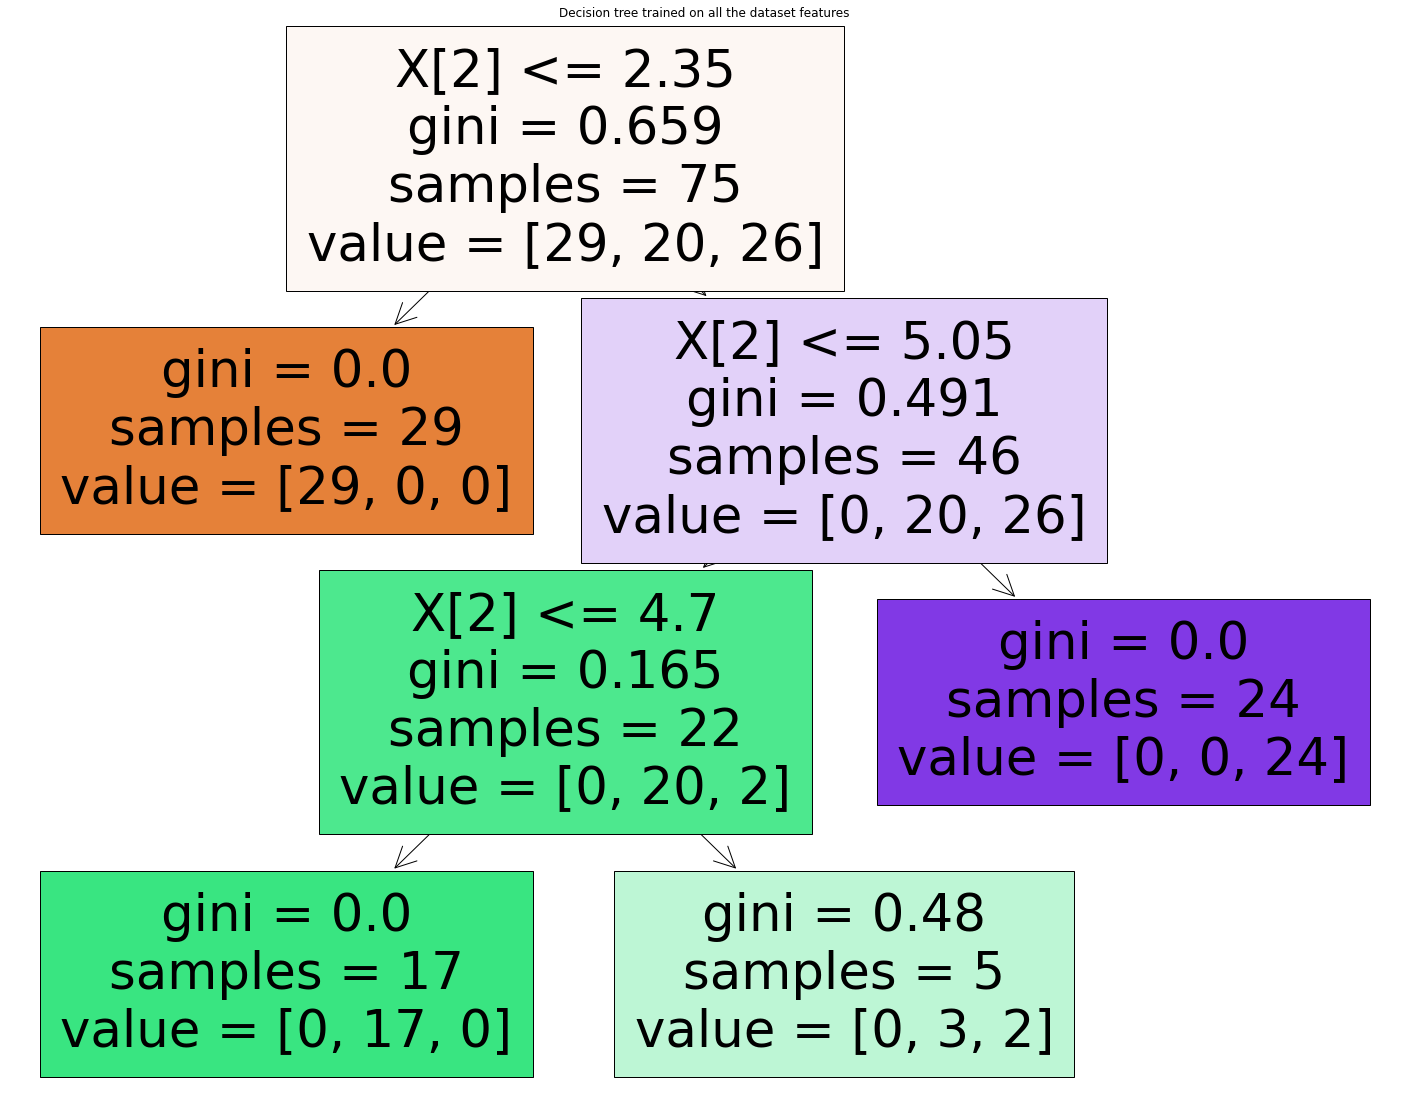

**********************************
[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 2. 1. 0. 1. 2. 1. 0. 2. 1. 1. 2. 0. 2. 0. 0. 1. 2. 2.
 1. 2. 1. 2. 1. 1. 1. 2. 1. 1. 1. 2.] for the test size:  0.4
**************************************
******************************
0.8666666666666667 for the test size:  0.4
**********************************
[[16  0  0]
 [ 0 22  1]
 [ 0  7 14]] confusion matrix
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.76      0.96      0.85        23
         2.0       0.93      0.67      0.78        21

    accuracy                           0.87        60
   macro avg       0.90      0.87      0.87        60
weighted avg       0.88      0.87      0.86        60
 classification report


<Figure size 432x288 with 0 Axes>

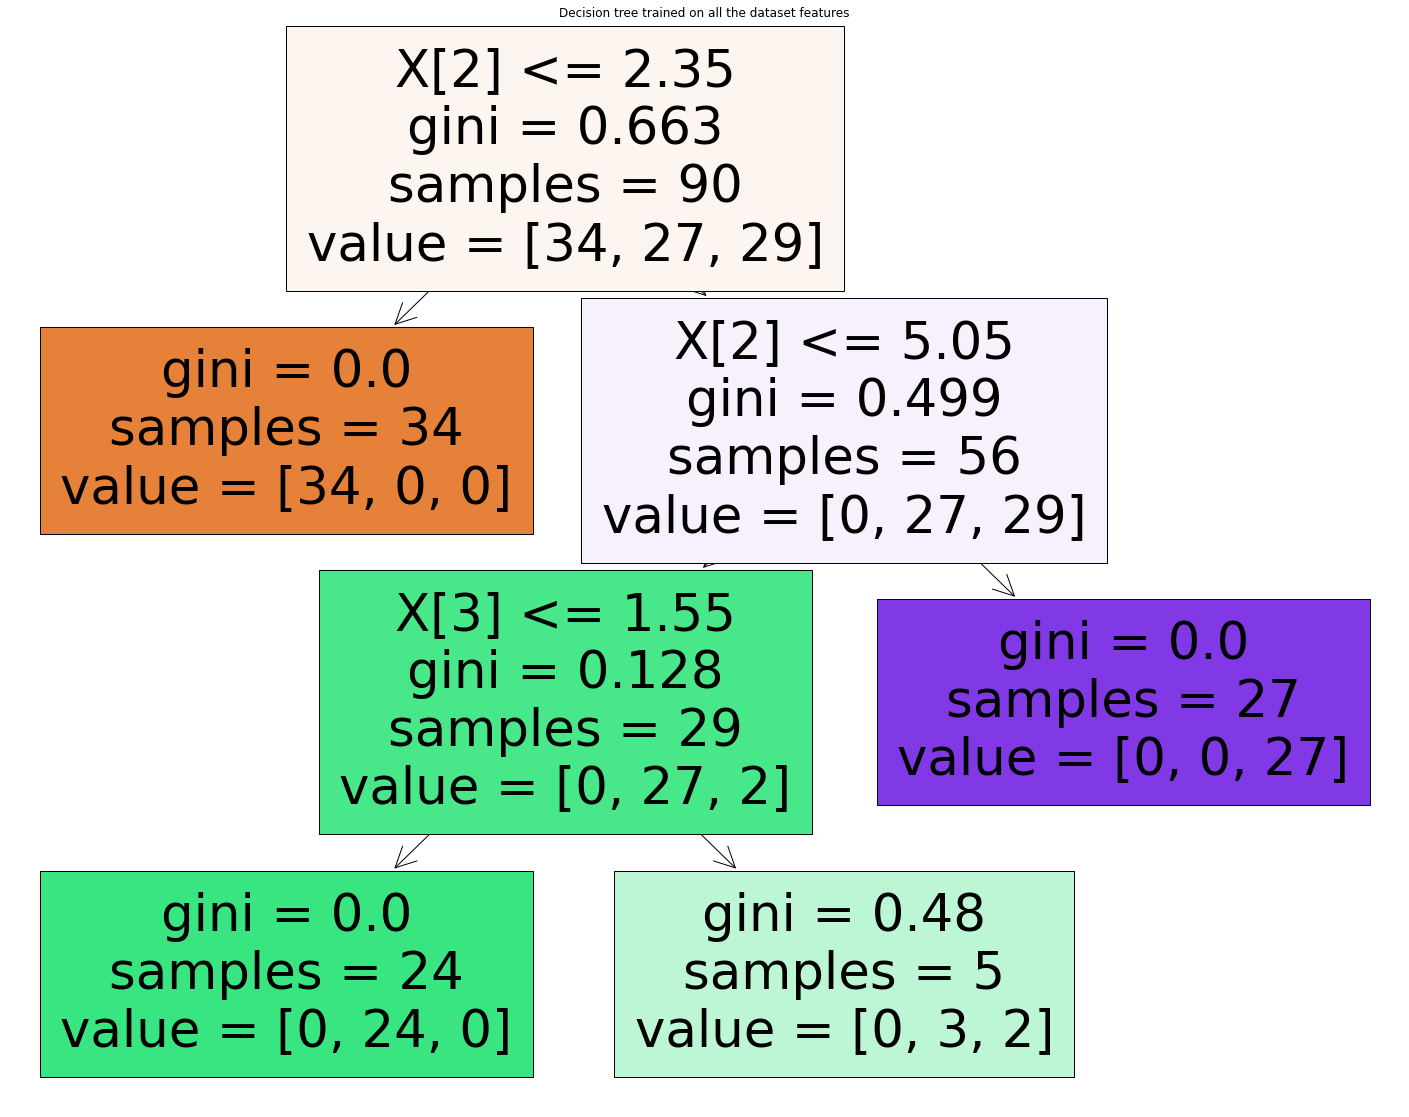

**********************************
[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 2. 1. 0. 1. 2. 1. 0. 2. 1. 1. 2. 0. 2. 0. 0.] for the test size:  0.3
**************************************
******************************
0.9111111111111111 for the test size:  0.3
**********************************
[[16  0  0]
 [ 0 17  1]
 [ 0  3  8]] confusion matrix
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.85      0.94      0.89        18
         2.0       0.89      0.73      0.80        11

    accuracy                           0.91        45
   macro avg       0.91      0.89      0.90        45
weighted avg       0.91      0.91      0.91        45
 classification report


<Figure size 432x288 with 0 Axes>

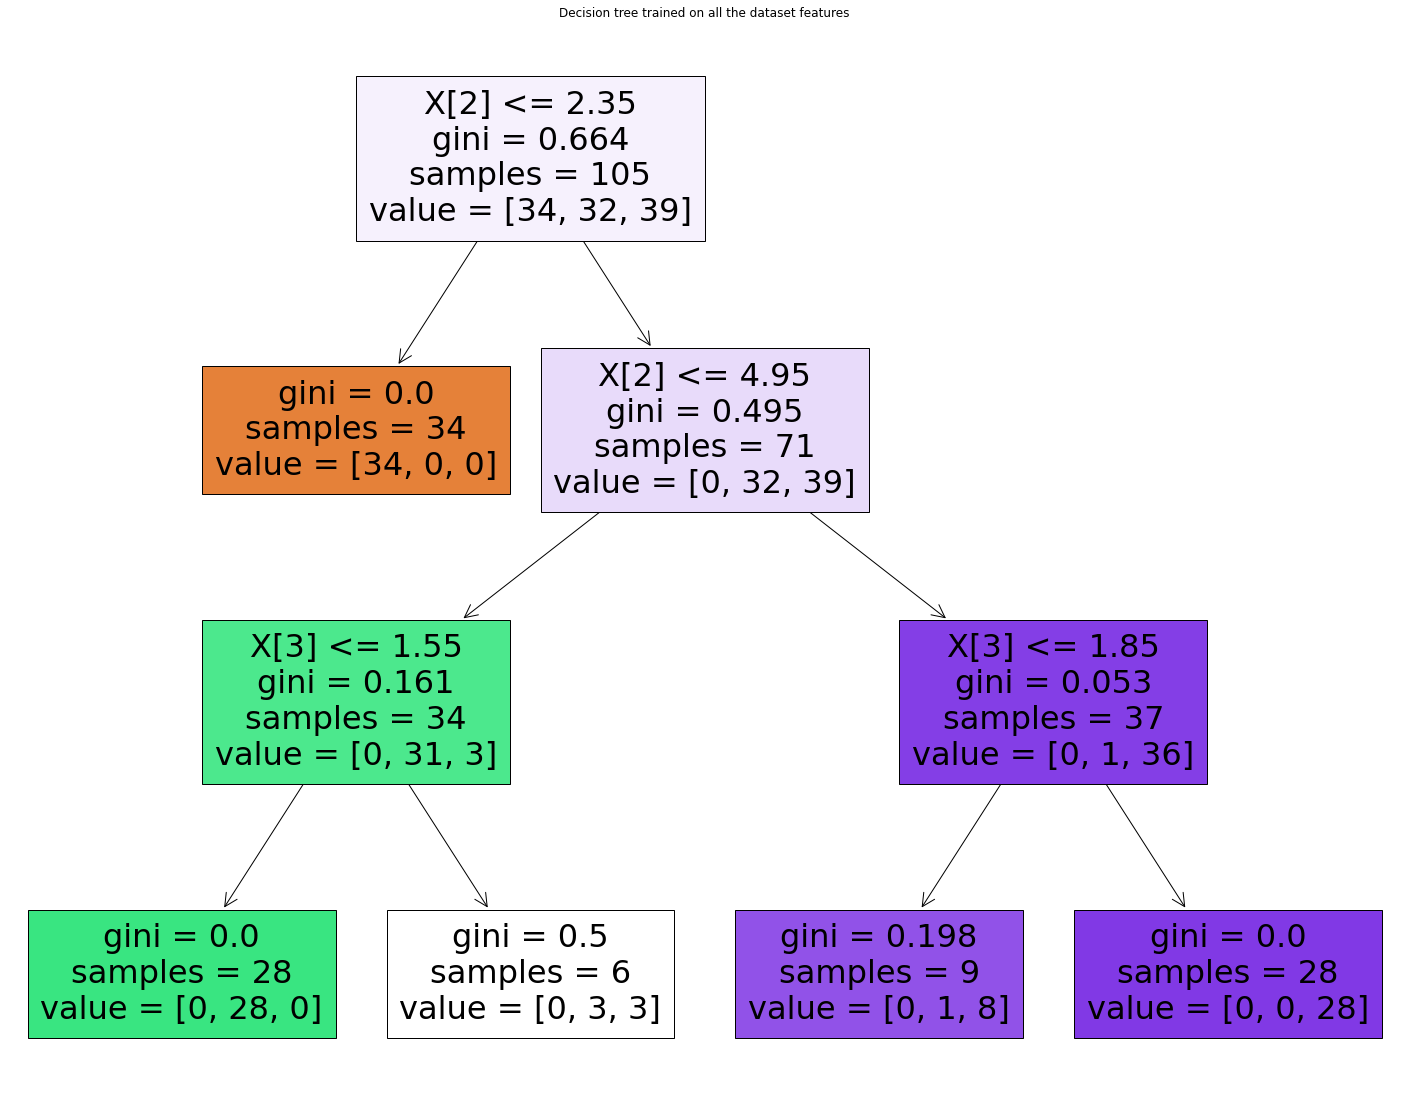

**********************************
[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.] for the test size:  0.2
**************************************
******************************
1.0 for the test size:  0.2
**********************************
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]] confusion matrix
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 classification report


<Figure size 432x288 with 0 Axes>

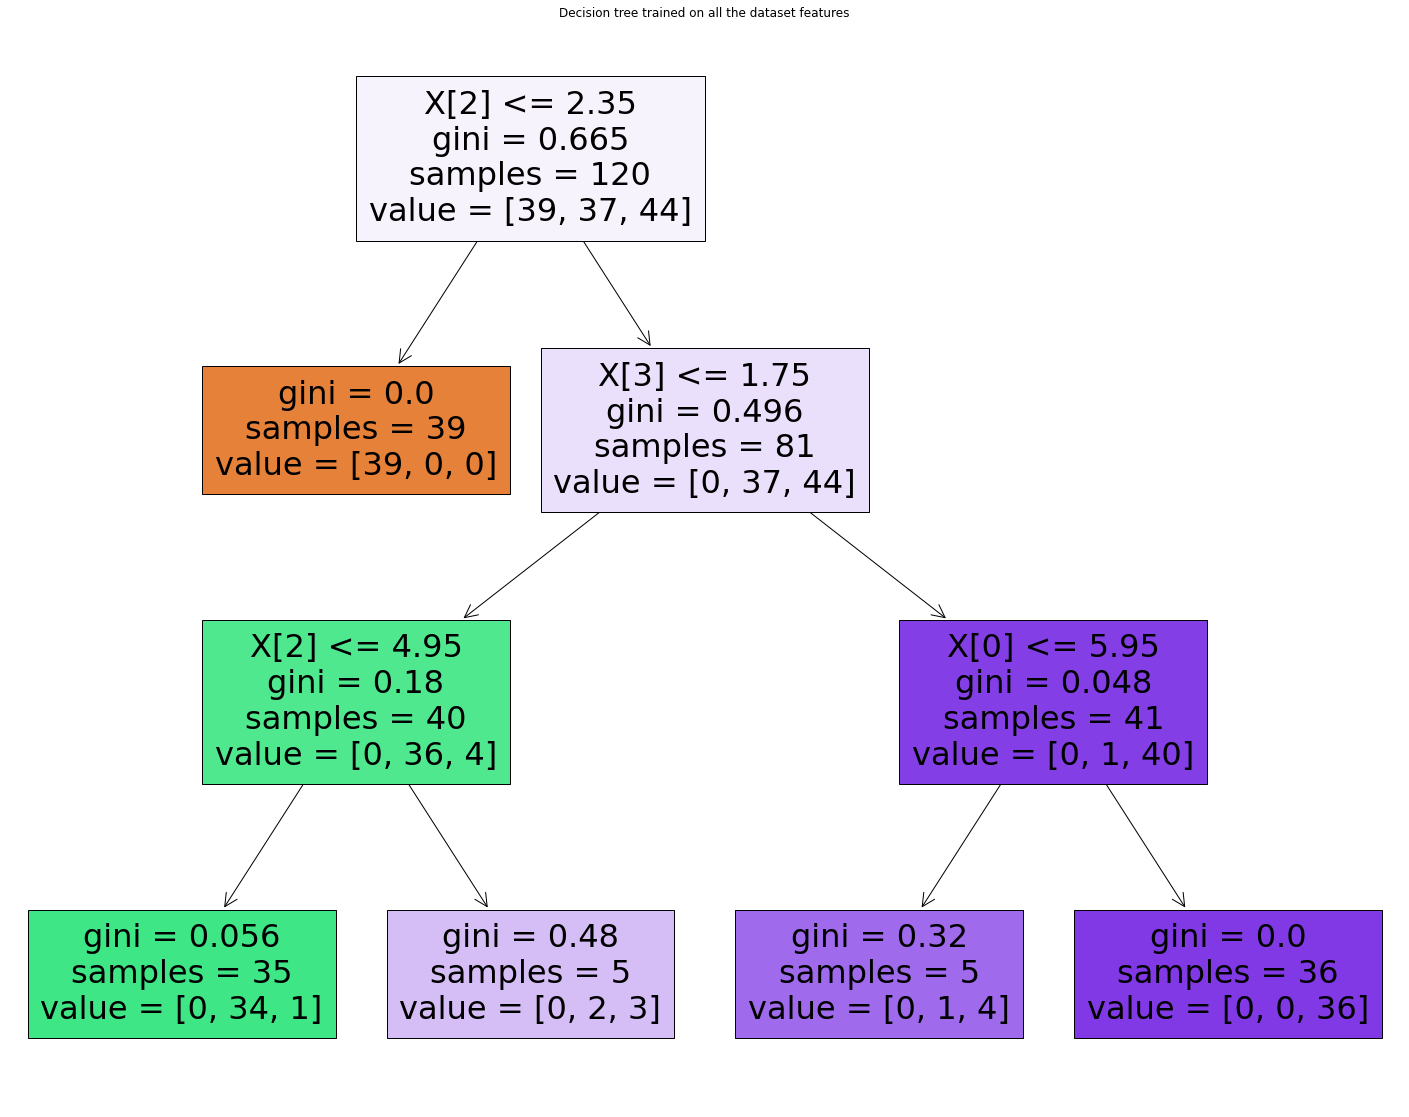

     target
0         0
1         0
2         0
3         0
4         0
..      ...
564       0
565       0
566       0
567       0
568       1

[569 rows x 1 columns]
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1

<Figure size 432x288 with 0 Axes>

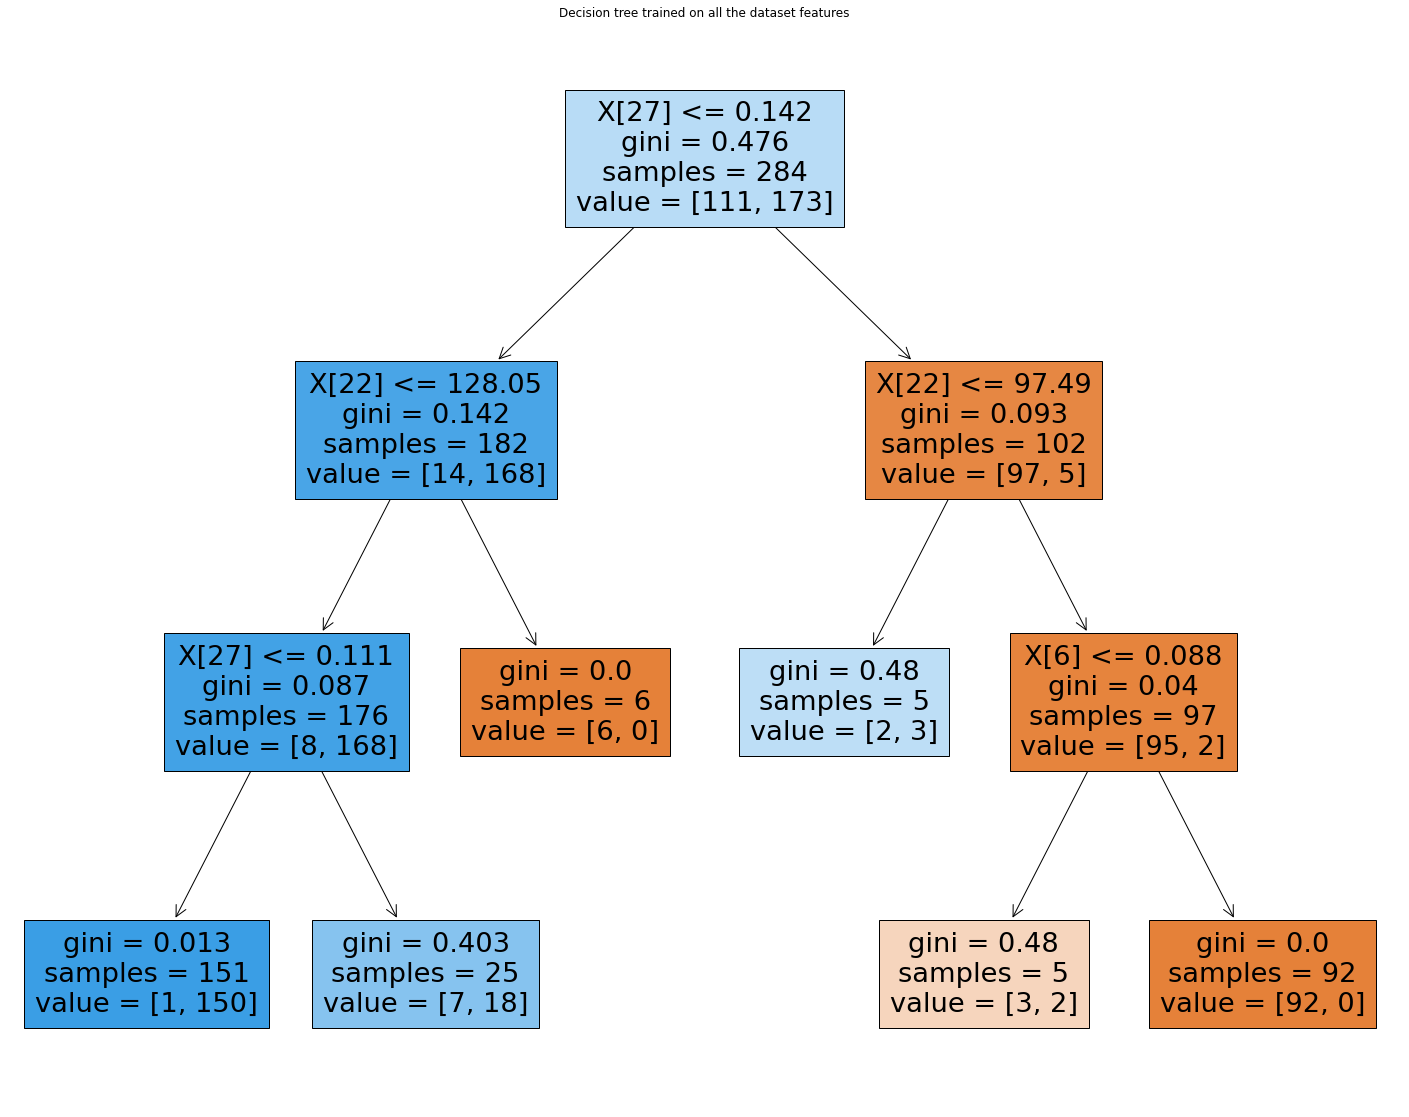

**********************************
[0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1
 1 1 1 1 1 0] for the test size:  0.4
**************************************
******************************
0.9210526315789473 for the test size:  0.4
**********************************
[[ 70  13]
 [  5 140]] confusion matrix
              precision    recall  f1-score   support

           0       0.93      0.84      0.89        83
           1       0.92      0.97      0.94       145

    accuracy                           0.92       228
   macro avg       0.92      0.90      0.91       228
weighted avg     

<Figure size 432x288 with 0 Axes>

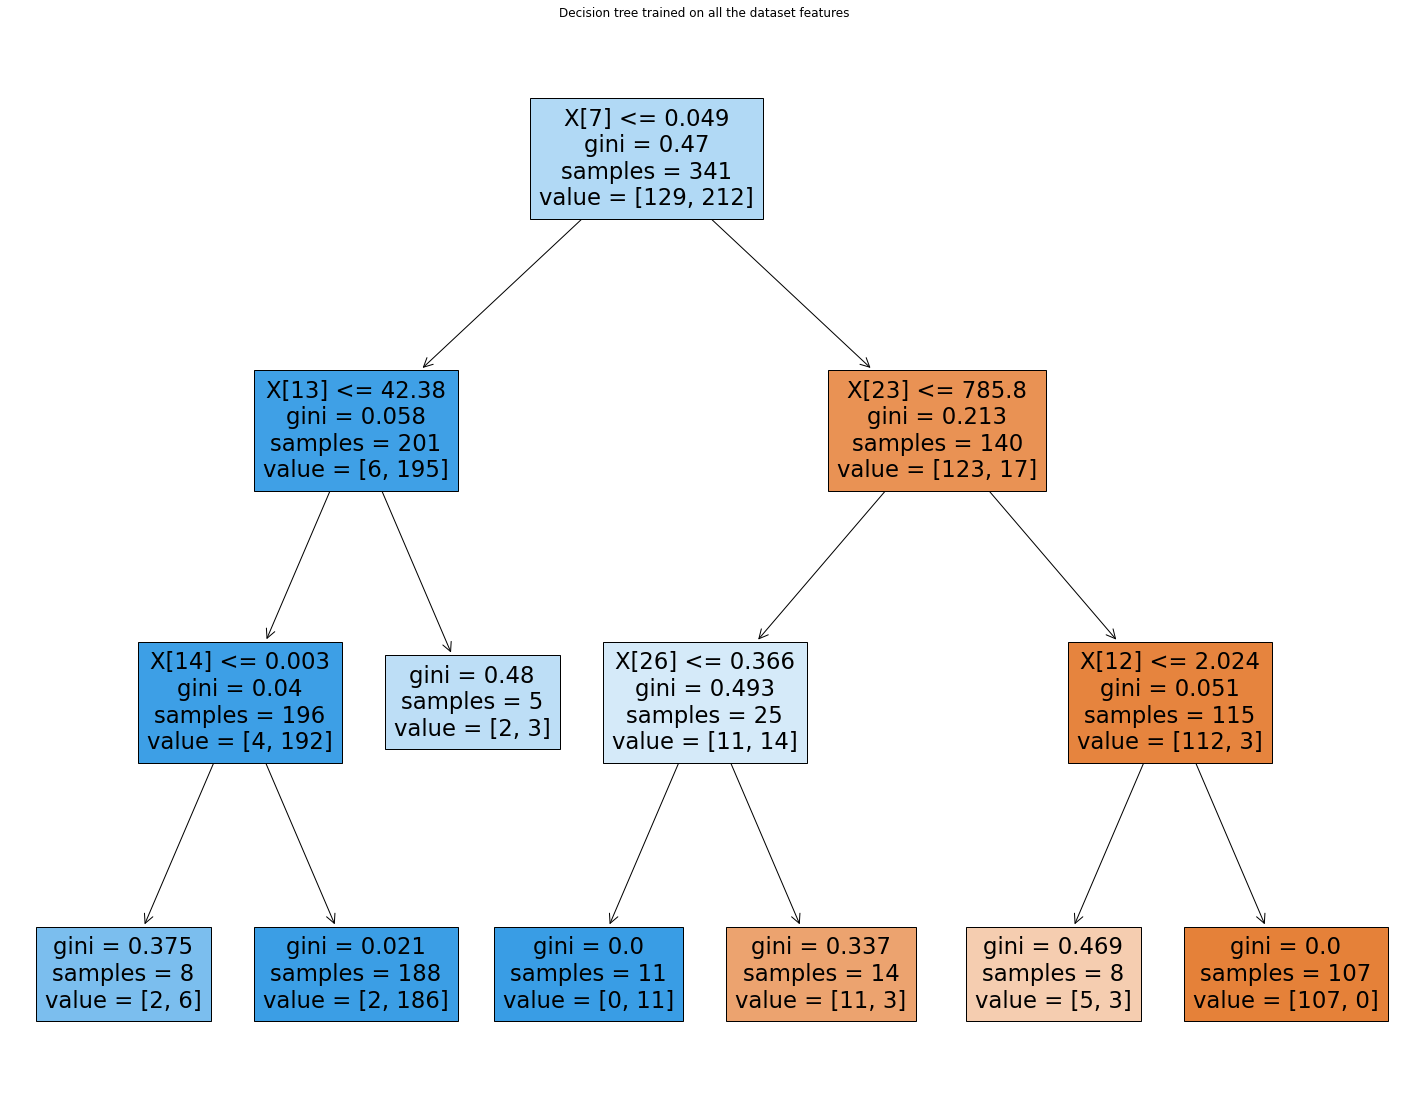

**********************************
[0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1] for the test size:  0.3
**************************************
******************************
0.9590643274853801 for the test size:  0.3
**********************************
[[ 60   3]
 [  4 104]] confusion matrix
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        63
           1       0.97      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171
 classification report


<Figure size 432x288 with 0 Axes>

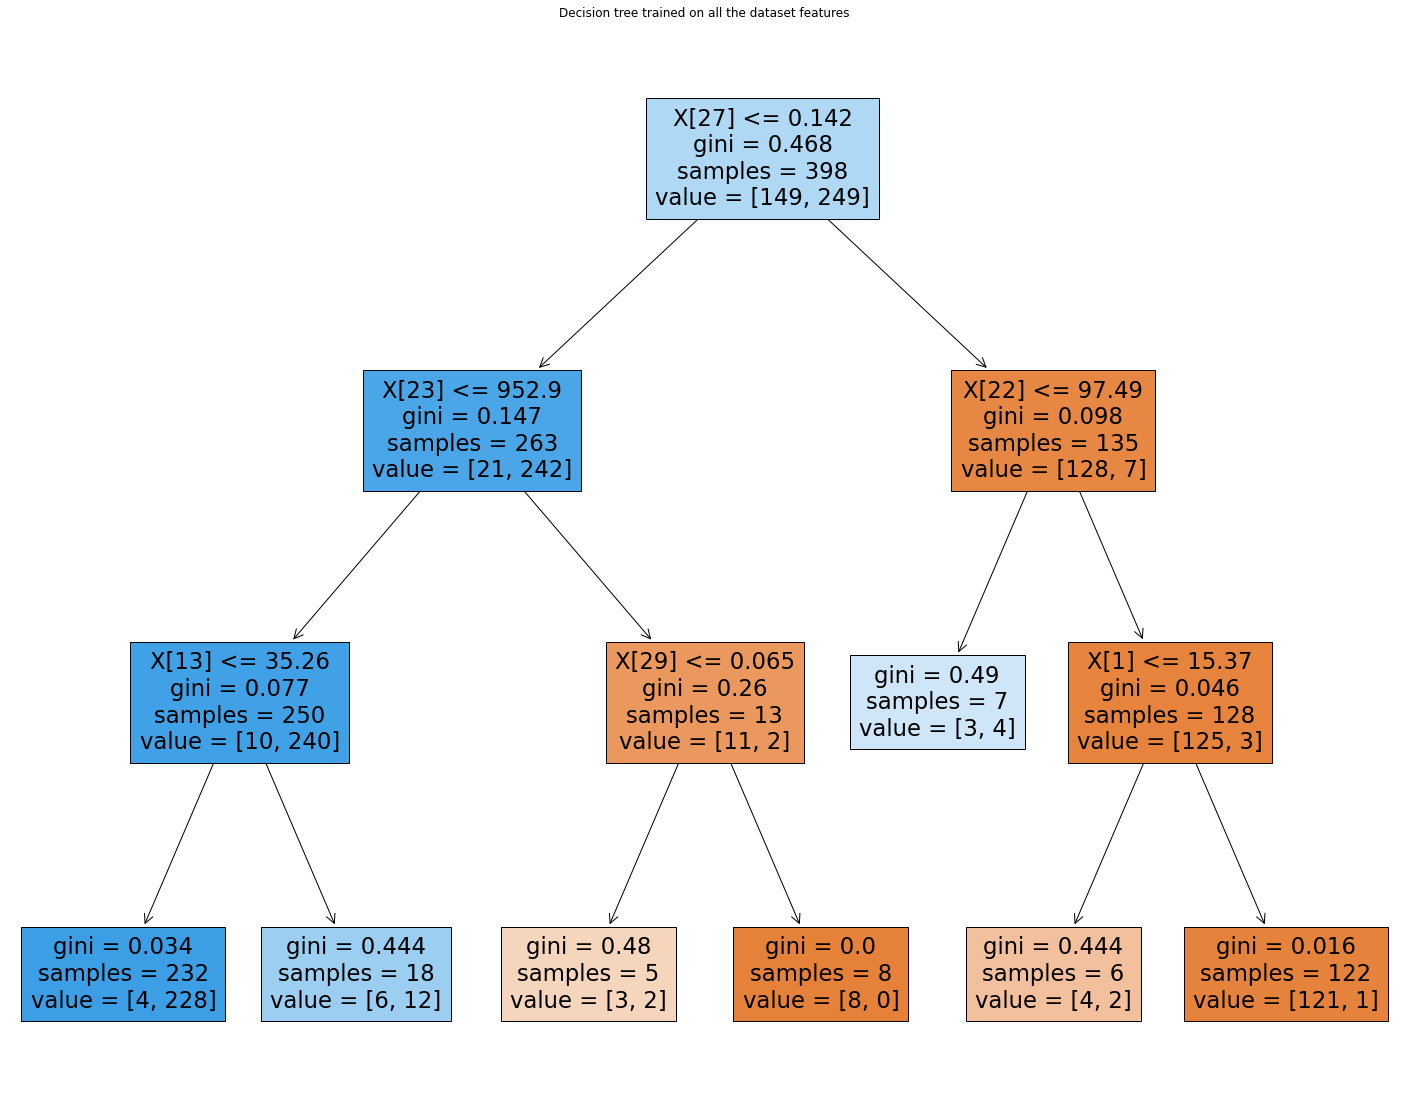

**********************************
[0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1] for the test size:  0.2
**************************************
******************************
0.9736842105263158 for the test size:  0.2
**********************************
[[45  2]
 [ 1 66]] confusion matrix
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114
 classification report


<Figure size 432x288 with 0 Axes>

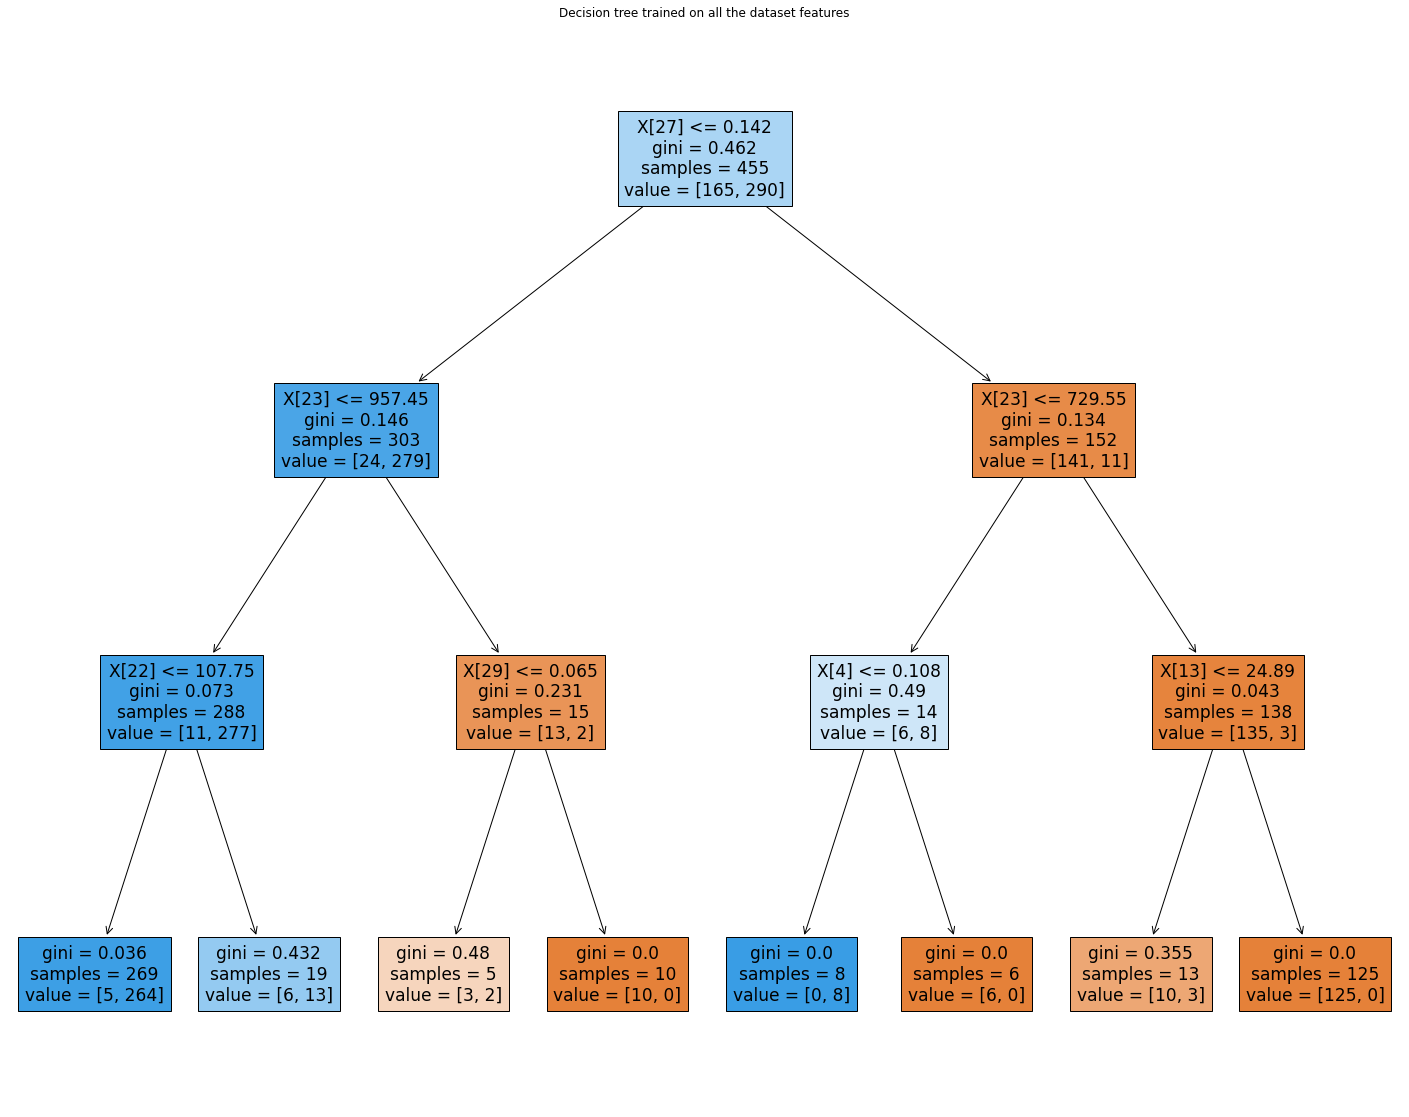

     target
0         0
1         0
2         0
3         0
4         0
..      ...
173       2
174       2
175       2
176       2
177       2

[178 rows x 1 columns]
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37            

<Figure size 432x288 with 0 Axes>

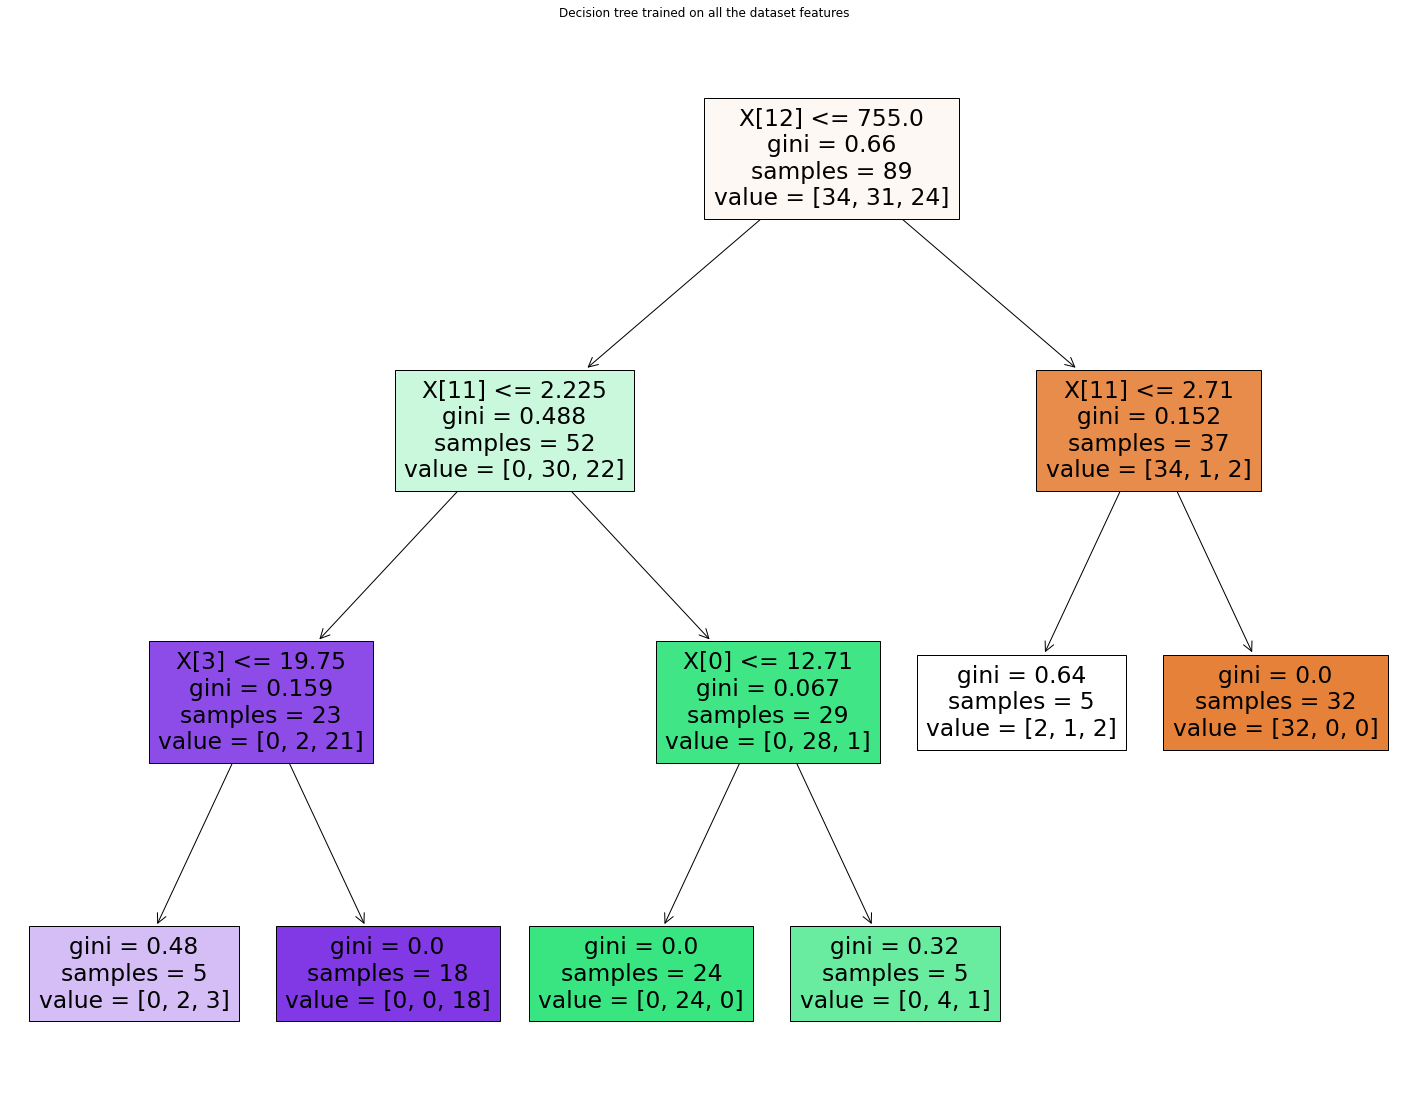

**********************************
[0 2 1 0 1 1 0 2 1 1 0 2 0 1 2 1 0 0 2 0 1 0 1 1 2 1 1 1 1 2 0 0 1 0 0 0 2
 2 1 2 0 0 1 1 1 0 2 0 0 0 2 2 0 2 0 1 0 0 1 2 2 0 2 2 1 2 2 1 0 2 0 1] for the test size:  0.4
**************************************
******************************
0.8194444444444444 for the test size:  0.4
**********************************
[[21  1  0]
 [ 2 23  6]
 [ 4  0 15]] confusion matrix
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        22
           1       0.96      0.74      0.84        31
           2       0.71      0.79      0.75        19

    accuracy                           0.82        72
   macro avg       0.82      0.83      0.81        72
weighted avg       0.84      0.82      0.82        72
 classification report


<Figure size 432x288 with 0 Axes>

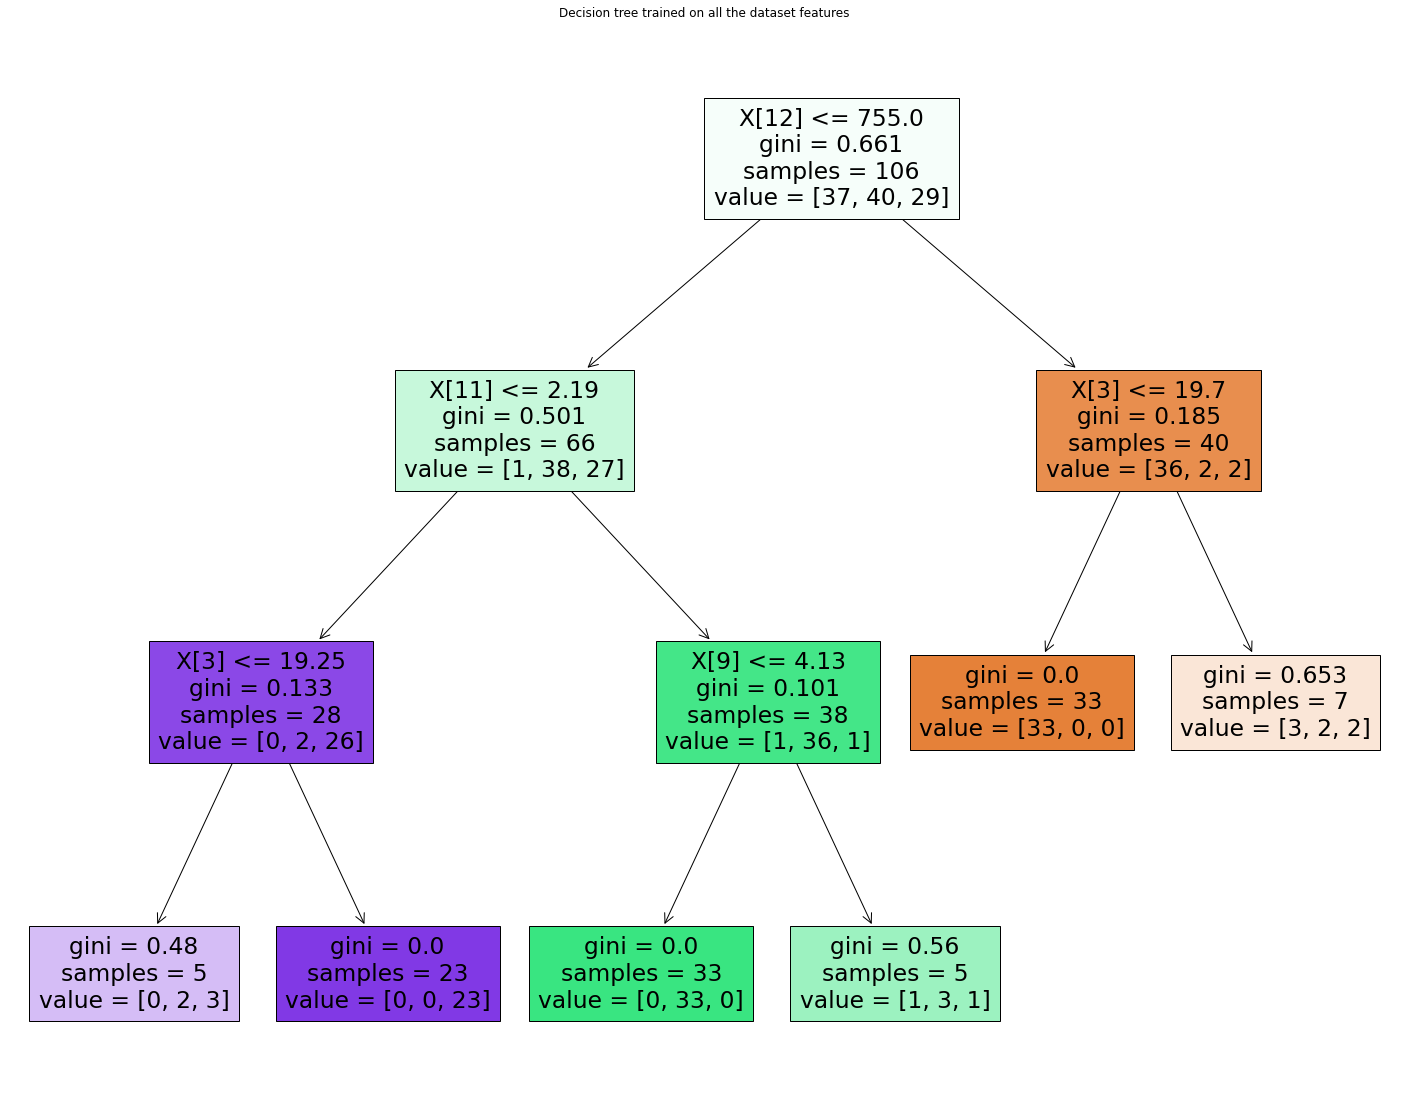

**********************************
[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 1 0 1 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 0 2 0 2 2 0 2] for the test size:  0.3
**************************************
******************************
0.9444444444444444 for the test size:  0.3
**********************************
[[18  1  0]
 [ 1 20  1]
 [ 0  0 13]] confusion matrix
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      0.91      0.93        22
           2       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.94      0.94      0.94        54
 classification report


<Figure size 432x288 with 0 Axes>

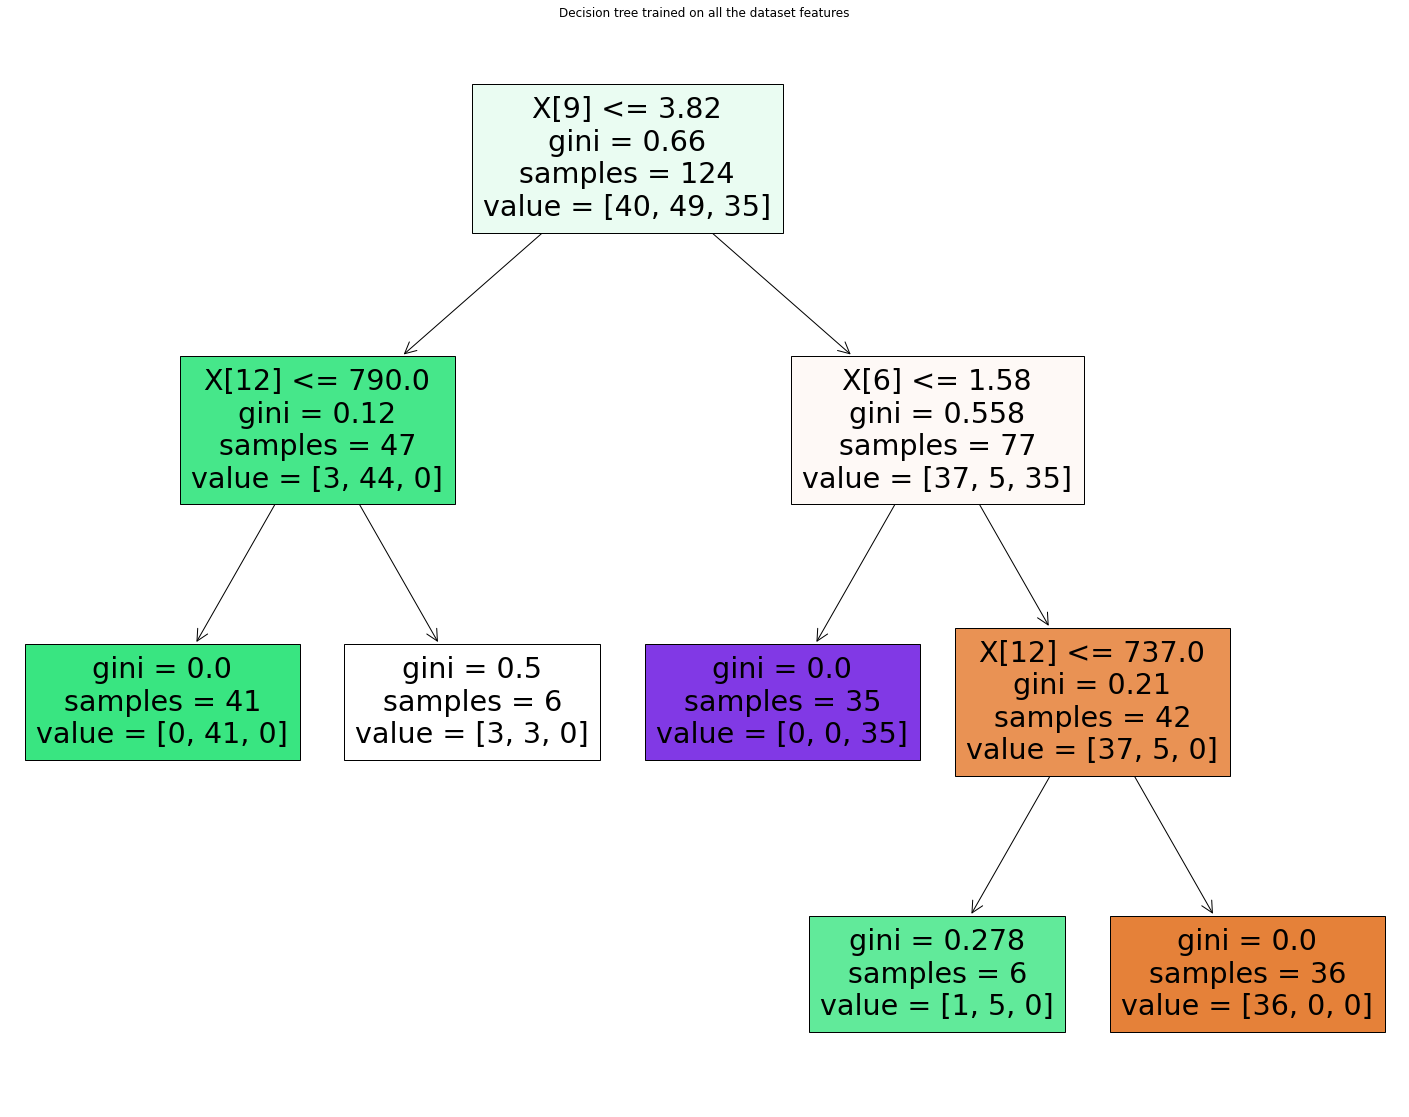

**********************************
[0 2 0 0 1 0 0 2 1 1 2 2 0 0 2 1 0 0 1 0 0 0 0 1 1 1 0 1 1 2 0 0 1 0 0 0] for the test size:  0.2
**************************************
******************************
0.8611111111111112 for the test size:  0.2
**********************************
[[14  0  0]
 [ 5 11  0]
 [ 0  0  6]] confusion matrix
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       1.00      0.69      0.81        16
           2       1.00      1.00      1.00         6

    accuracy                           0.86        36
   macro avg       0.91      0.90      0.89        36
weighted avg       0.90      0.86      0.86        36
 classification report


<Figure size 432x288 with 0 Axes>

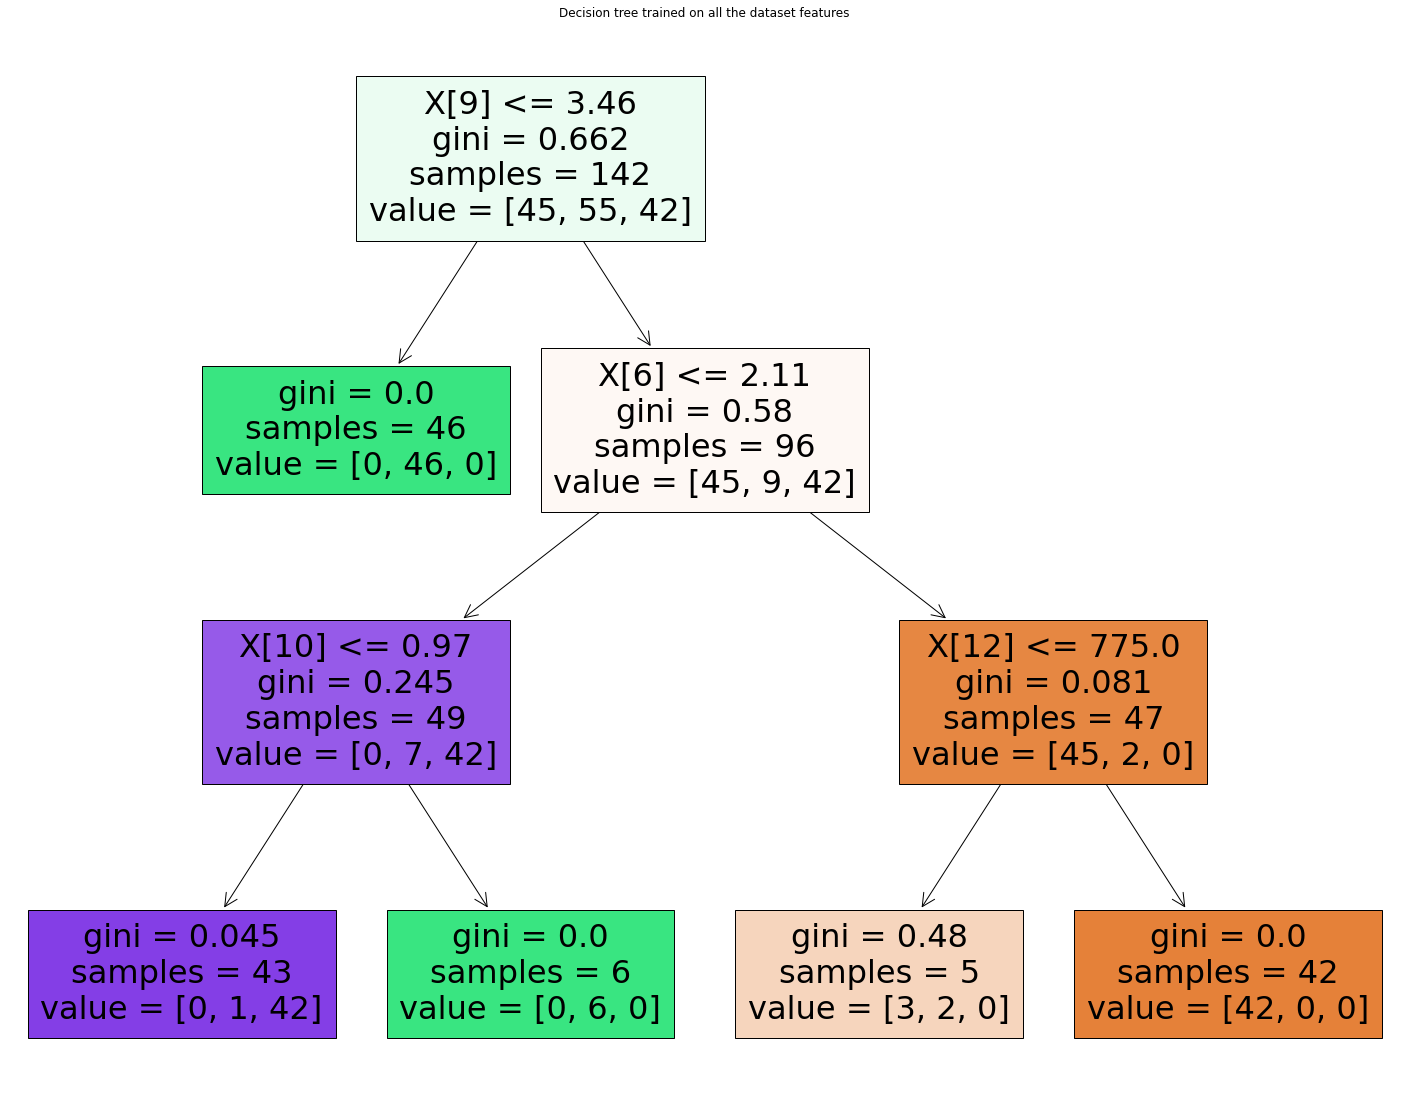

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor
import graphviz
l2=[data,df,df1]
l1=[0.5,0.4,0.3,0.2]
df2=pd.DataFrame(columns = ['dataset name','test size','accuracy_score'])
for i in l2:
    l1=[0.5,0.4,0.3,0.2]
    X = i.drop('target',axis=1)
    y = i[['target']]
    print(y)
    print(X)
    for a in l1:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=a, random_state=0)
        clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
        clf_model.fit(X_train,y_train)
        y_predict = clf_model.predict(X_test)
        print("**********************************")
        print(y_predict,"for the test size: ",a)
        print("**************************************")
        s=accuracy_score(y_test,y_predict)
        print("******************************")
        print(s,"for the test size: ",a)
        print('**********************************')
        print(confusion_matrix(y_test, y_predict),"confusion matrix")
        print(classification_report(y_test, y_predict),"classification report")
        plt.figure()
        fig = plt.figure(figsize=(25,20))
        plot_tree(clf_model, filled=True)
        plt.title("Decision tree trained on all the dataset features")
        plt.show()
        data={'dataset name':i,'test size':a,'accuracy_score':s}
        df2=df2.append(data,ignore_index=True)



In [20]:
df2

dataset name  test size  \
0        sepal length (cm)  sepal width (cm)  peta...        0.5   
1        sepal length (cm)  sepal width (cm)  peta...        0.4   
2        sepal length (cm)  sepal width (cm)  peta...        0.3   
3        sepal length (cm)  sepal width (cm)  peta...        0.2   
4        mean radius  mean texture  mean perimeter...        0.5   
5        mean radius  mean texture  mean perimeter...        0.4   
6        mean radius  mean texture  mean perimeter...        0.3   
7        mean radius  mean texture  mean perimeter...        0.2   
8        alcohol  malic_acid   ash  alcalinity_of_...        0.5   
9        alcohol  malic_acid   ash  alcalinity_of_...        0.4   
10       alcohol  malic_acid   ash  alcalinity_of_...        0.3   
11       alcohol  malic_acid   ash  alcalinity_of_...        0.2   

    accuracy_score  
0         0.893333  
1         0.866667  
2         0.911111  
3         1.000000  
4         0.929825  
5         0.921053  
6         0.959064  
7         0.973684  
8         0.831461  
9         0.819444  
10        0.944444  
11        0.861111